In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Import Data

In [39]:
df = pd.read_csv('../data/AnnualMotorVehicleInspectionPassingRateofMotorVehiclesonFirstInspection.csv')

In [40]:
df.head()

,year,type,age,number_reported,number_passed,passing_rate
0,2006,Cars,1,455,432,94.9
1,2006,Cars,2,1082,1026,94.8
2,2006,Cars,3,73558,68432,93.0
3,2006,Cars,4,627,560,89.3
4,2006,Cars,5,17963,16716,93.1


In [ ]:
print(df.dtypes)


In [41]:
df['year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017])

In [42]:
df['age'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '>10'],
      dtype=object)

In [43]:
is_null = df.isnull().any()
print(is_null)

year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


In [44]:
numerical_variables = ['number_reported', 'number_passed', 'passing_rate']
quantile = df[numerical_variables].describe().loc[['min', '25%', '50%', '75%', 'max']].transpose()
quantile.columns = ['min', 'Q1', 'Q2', 'Q3', 'max']
quantile['range'] = quantile['max'] - quantile['min']
quantile['IQR'] = quantile['Q3'] - quantile['Q1']
quantile

,min,Q1,Q2,Q3,max,range,IQR
number_reported,0.0,434.000000,4665.5,10870.000000,116702.0,116702.0,10436.00000
number_passed,0.0,418.250000,4299.0,9970.500000,109209.0,109209.0,9552.25000
passing_rate,0.0,85.452967,92.5,96.977437,100.0,100.0,11.52447


In [45]:
descriptive_stats = df[numerical_variables].describe().loc[['mean', 'std', '50%']].transpose()
descriptive_stats.columns = ['mean', 'std', 'median']
descriptive_stats['mode'] = df[numerical_variables].mode().transpose()[0]
descriptive_stats['mad'] = [stats.median_abs_deviation(df[x]) for x in numerical_variables]
descriptive_stats['kurtosis'] = [stats.kurtosis(df[x], fisher=False) for x in numerical_variables]
descriptive_stats['excess kurtosis'] = [stats.kurtosis(df[x], fisher=True) for x in numerical_variables]
descriptive_stats['skewness'] = [stats.skew(df[x]) for x in numerical_variables]
descriptive_stats


,mean,std,median,mode,mad,kurtosis,excess kurtosis,skewness
number_reported,9338.531566,17196.427270,4665.5,0.0,4462.500000,19.207326,16.207326,3.794920
number_passed,8480.472222,15508.869146,4299.0,0.0,4104.500000,18.772457,15.772457,3.749528
passing_rate,85.640487,23.781986,92.5,0.0,5.583725,11.315604,8.315604,-3.072467


In [46]:
df['type'].unique()

array(['Cars', 'Motorcycles', 'Scheduled Buses', 'Other Buses', 'Taxis',
       'Goods & Other Vehicles'], dtype=object)

# Task 1: 
### What's the average passing rate on first inspection each year, taking into account motorcycles of all age groups?

In [47]:
motorcycle_df = df[df['type'] == 'Motorcycles']
avg_passing_rate_per_year = motorcycle_df.groupby('year').agg({'passing_rate': 'mean'}).rename(columns={'passing_rate': 'average_passing_rate'}).reset_index()
print(f'The average passing rate on first inspection each year, taking into account motorcycles of all age groups is: \n{avg_passing_rate_per_year}')

The average passing rate on first inspection each year, taking into account motorcycles of all age groups is: 
    year  average_passing_rate
0   2006             92.990909
1   2007             93.686925
2   2008             93.870527
3   2009             93.873521
4   2010             93.981256
5   2011             94.045351
6   2012             92.791833
7   2013             89.050335
8   2014             83.116493
9   2015             86.459294
10  2016             87.506665
11  2017             87.604945


# Task 2
### For motorcycles of each age, estimate their passing rate next year.

Assume current year is 2017 as the latest year available in the given dataset is 2017. Hence, 'next year' is 2018. 

In [48]:
motorcycle_df['age'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '>10'],
      dtype=object)

In [50]:
def plot_visualisation(age, years, passing_rates):
    plt.plot(years, passing_rates)
    plt.title(f"Passing Rate for Age {age}")
    plt.show()

In [51]:
def plot_decomposition(passing_rates):
    result = seasonal_decompose(passing_rates, model='additive', period=1)
    result.plot()
    plt.show()

In [52]:
def plot_autocorrelation(passing_rates):
    plot_acf(passing_rates)
    plot_pacf(passing_rates,lags = 4)
    plt.show()

In [53]:
def adf_test(age, passing_rates):
    adf_result = adfuller(passing_rates)
    print(f"ADF Statistic for Age {age}: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    

Checking missing data for the following age group 1: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


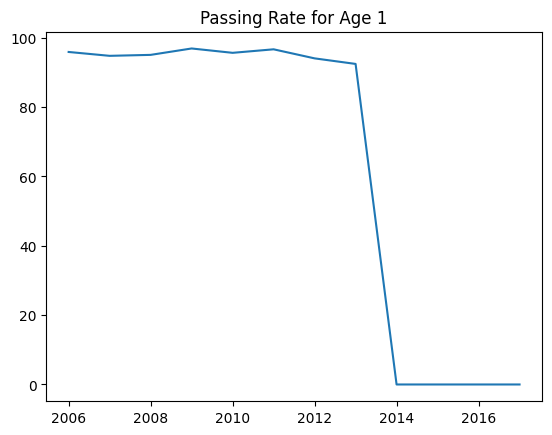

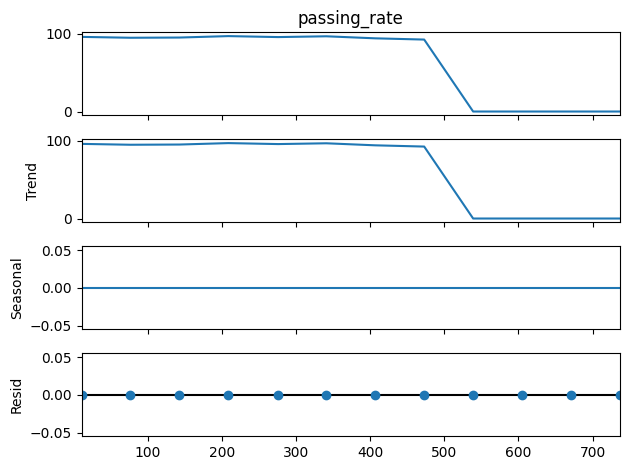

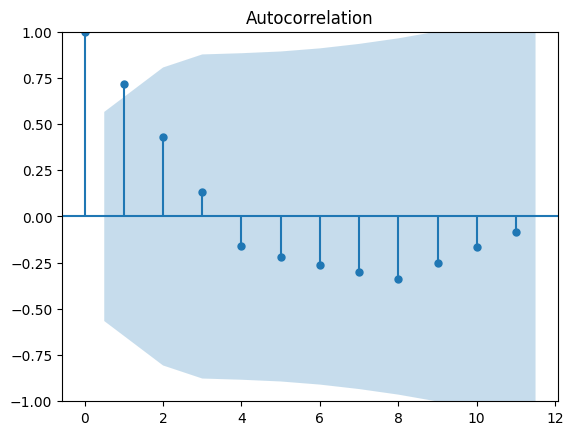

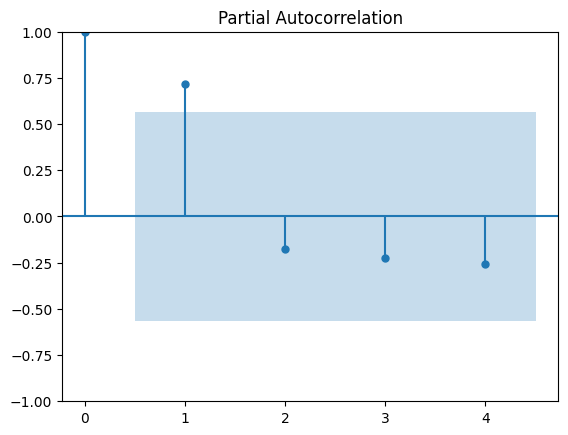

ADF Statistic for Age 1: -1.338982506241492
p-value: 0.611154533993292
Checking missing data for the following age group 2: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


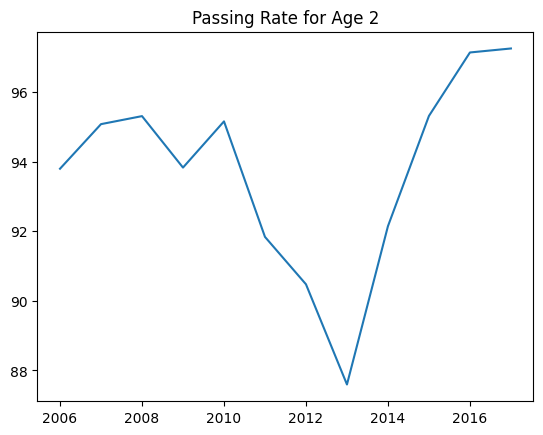

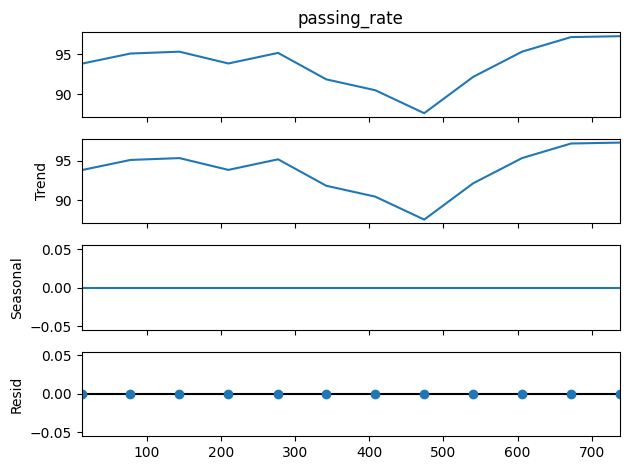

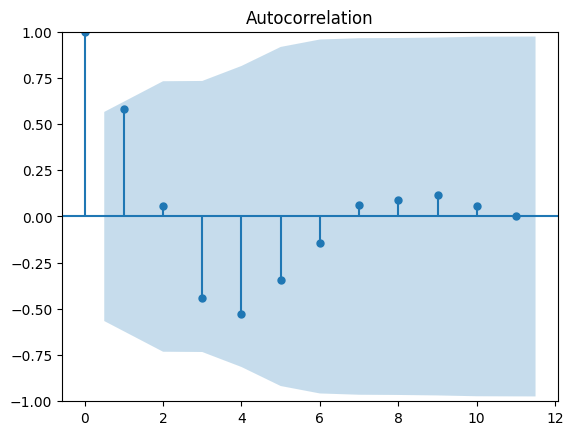

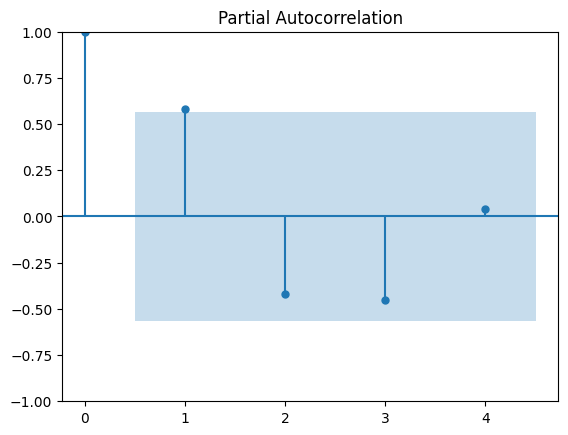

ADF Statistic for Age 2: -2.6968245443230034
p-value: 0.07458937531982503
Checking missing data for the following age group 3: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


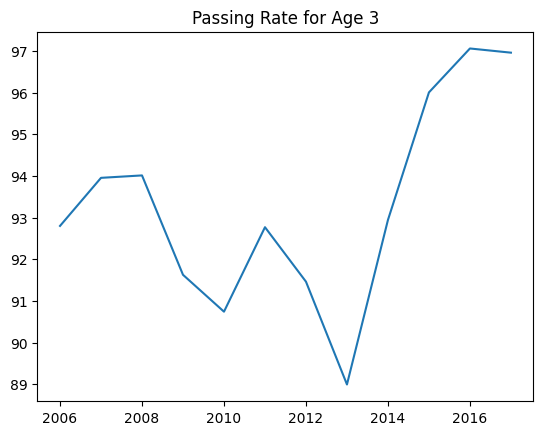

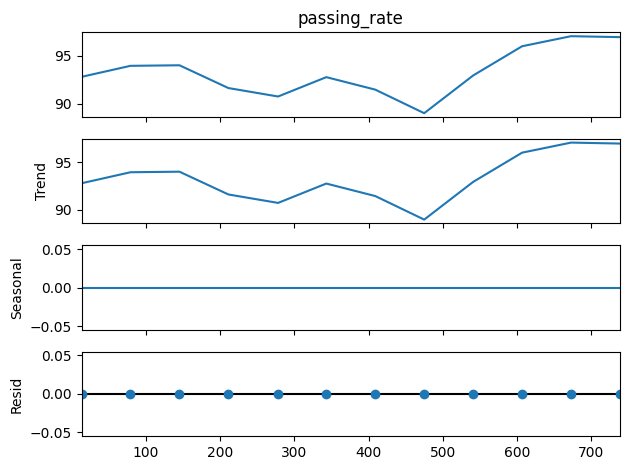

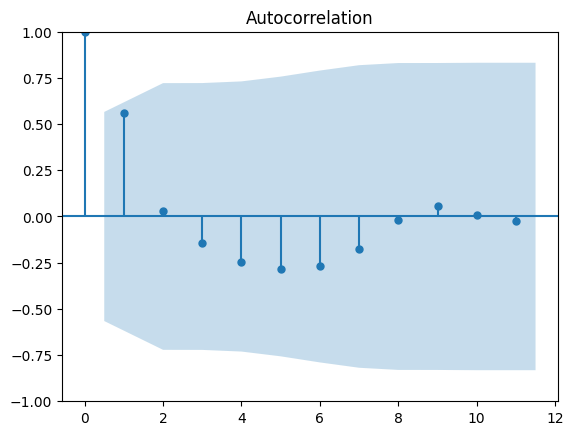

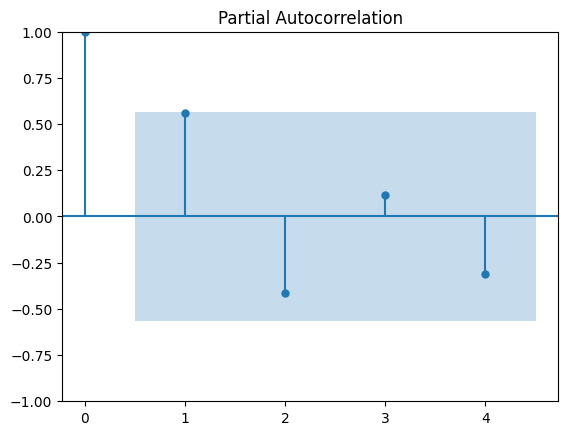

ADF Statistic for Age 3: -1.6678537364819979
p-value: 0.44774663071526055
Checking missing data for the following age group 4: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


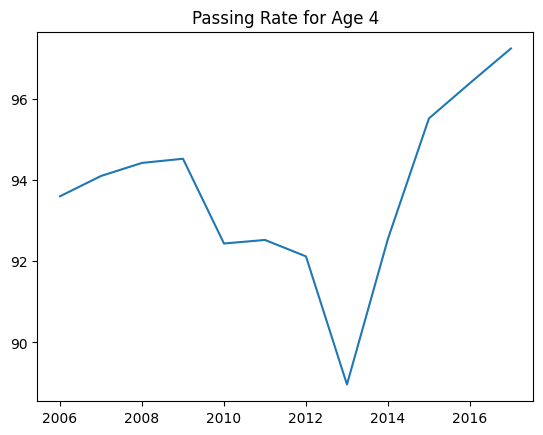

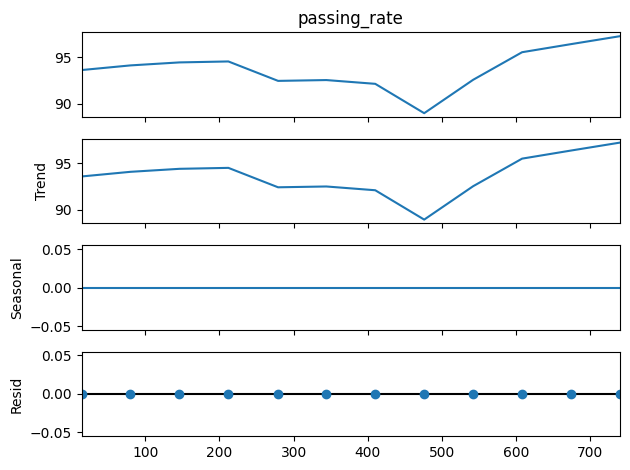

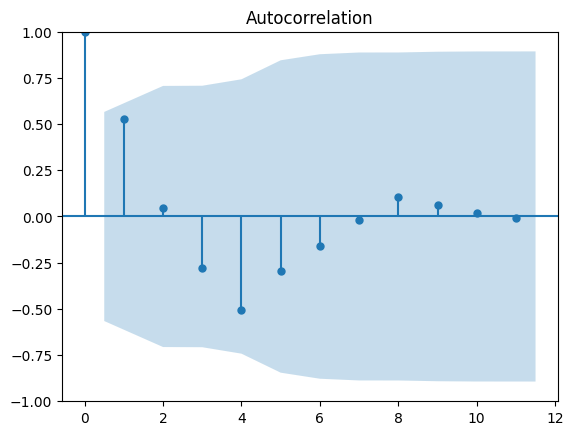

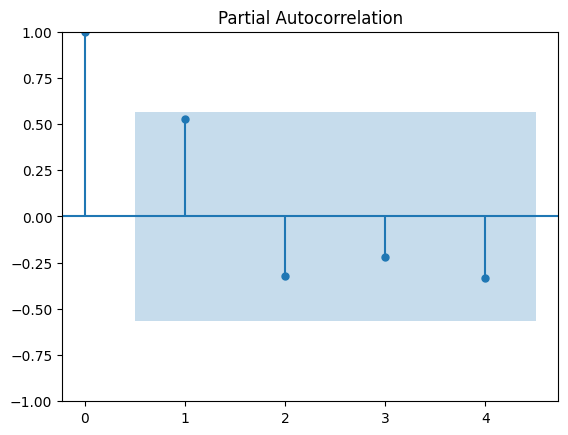

ADF Statistic for Age 4: -1.6659869217107324
p-value: 0.4487167002736868
Checking missing data for the following age group 5: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


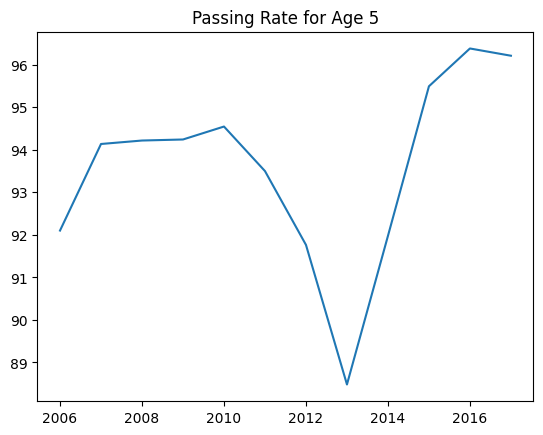

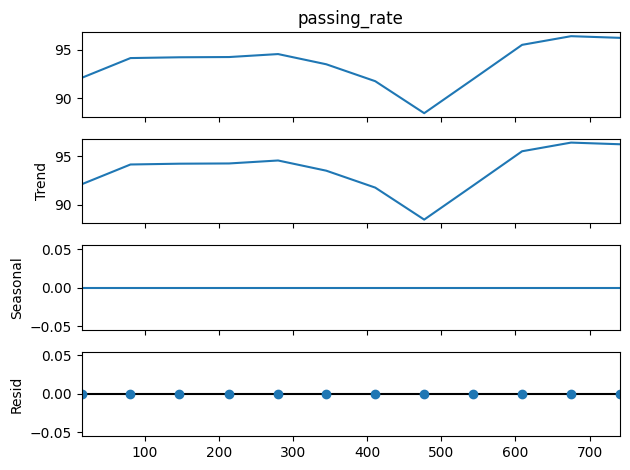

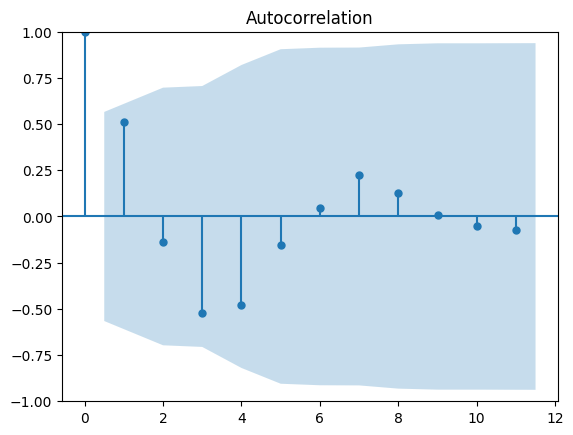

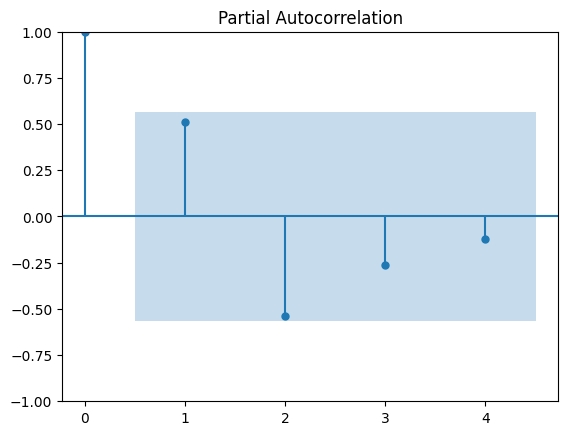

ADF Statistic for Age 5: -1.5049176779826516
p-value: 0.5310772463777098
Checking missing data for the following age group 6: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


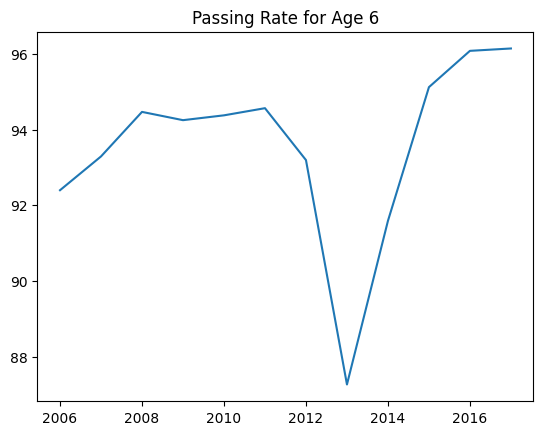

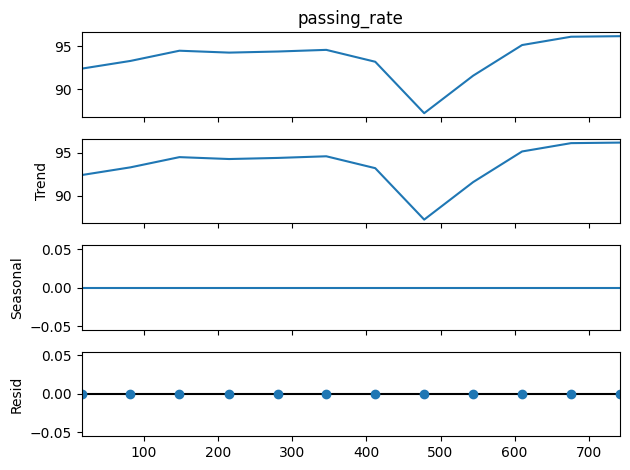

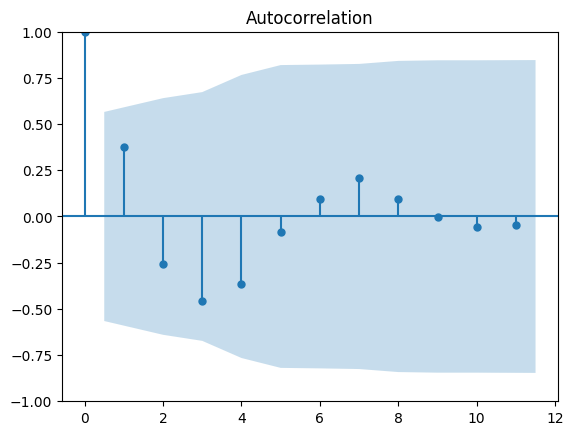

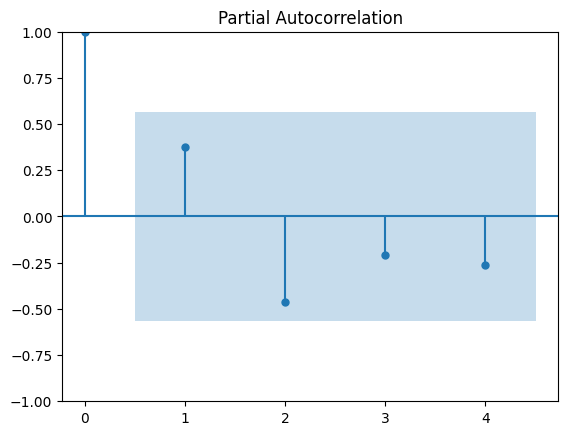

ADF Statistic for Age 6: -3.7829378883722558
p-value: 0.003086787040939627
Checking missing data for the following age group 7: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


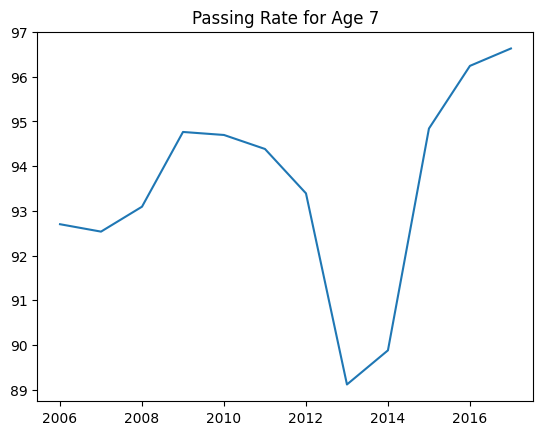

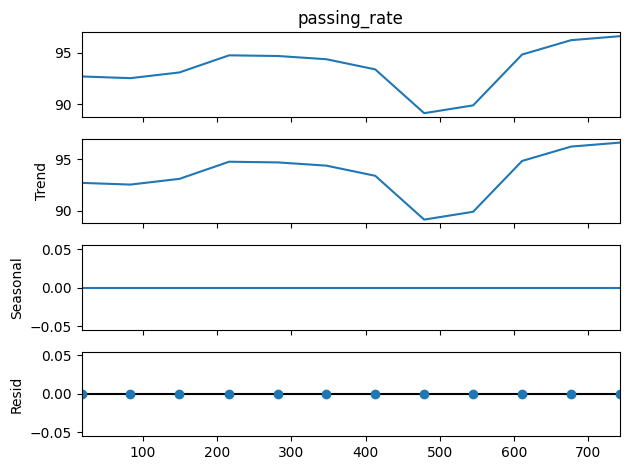

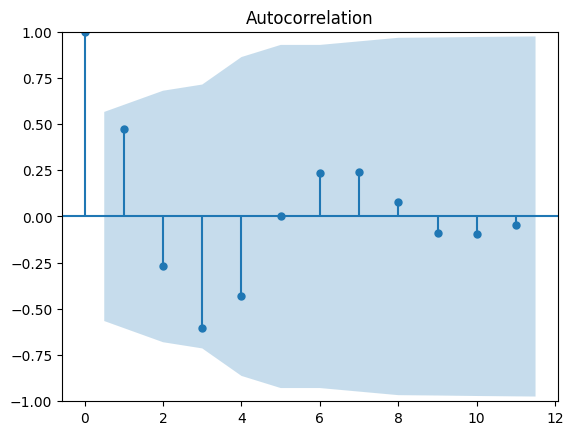

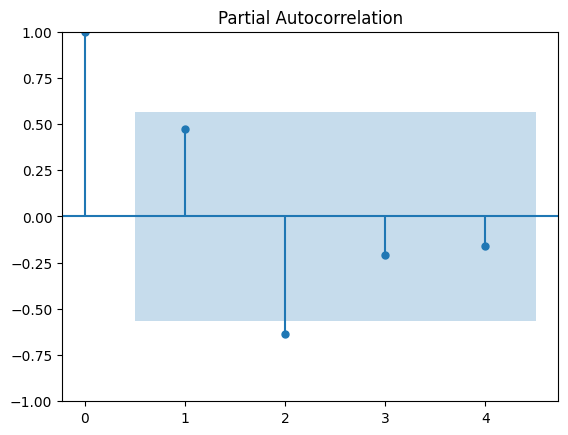

ADF Statistic for Age 7: -1.5713575865327827
p-value: 0.4979636040282055
Checking missing data for the following age group 8: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


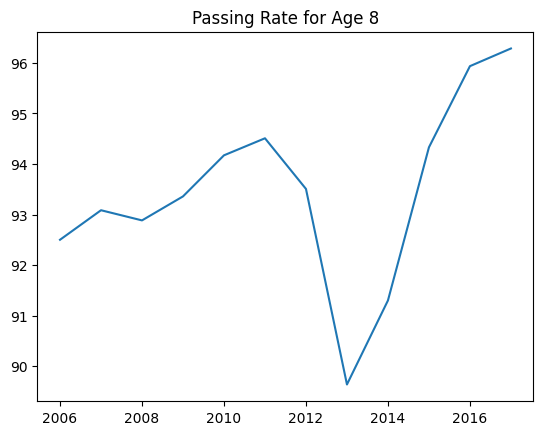

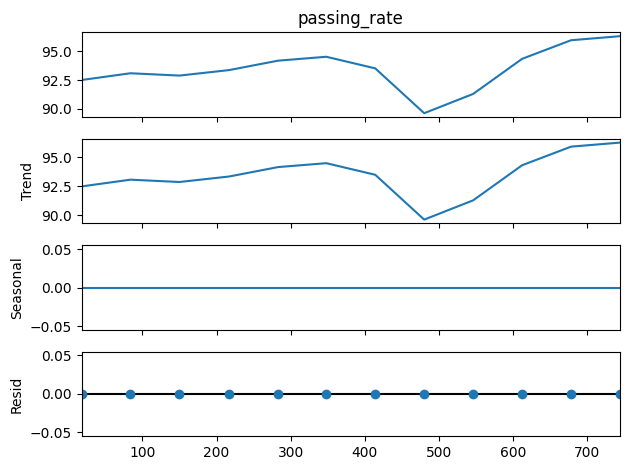

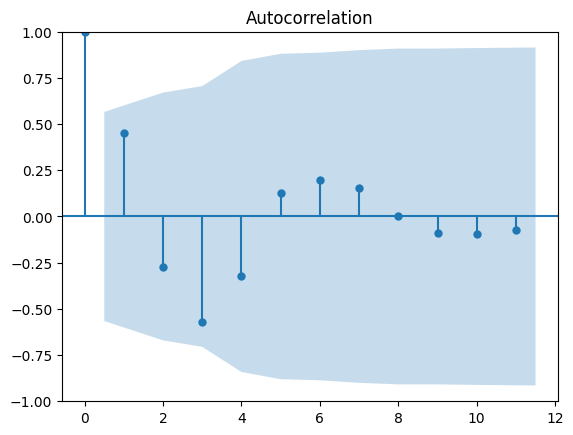

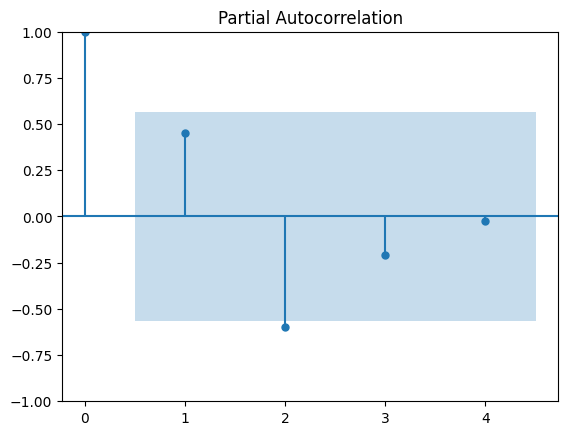

ADF Statistic for Age 8: -1.274675802743662
p-value: 0.6406770759588504
Checking missing data for the following age group 9: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


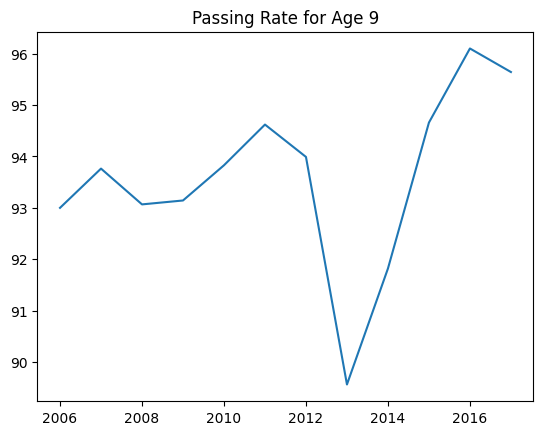

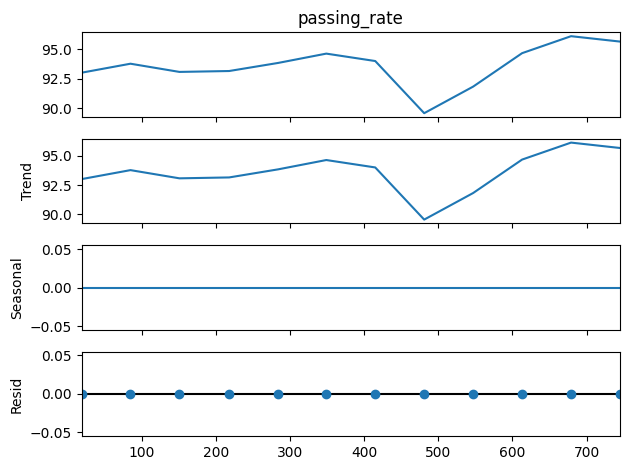

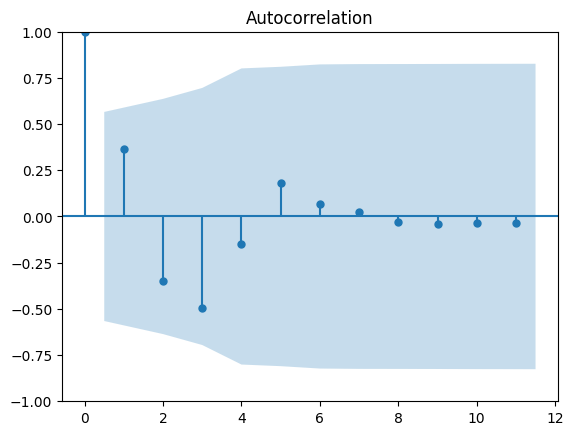

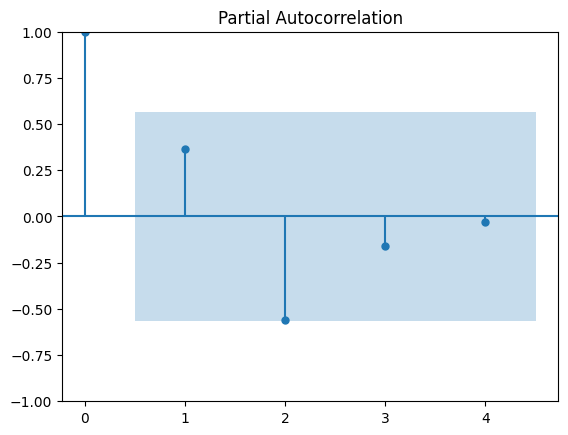

ADF Statistic for Age 9: -2.2170849398899173
p-value: 0.20010314623739428
Checking missing data for the following age group 10: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


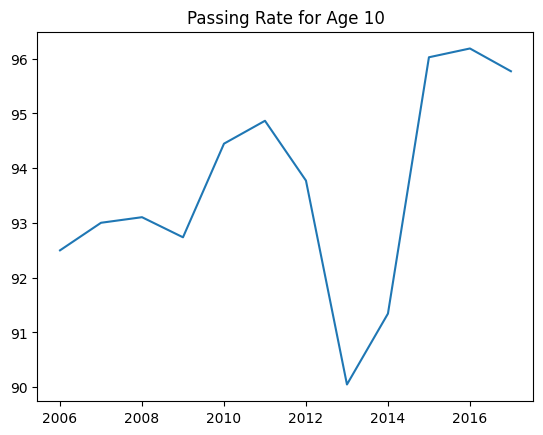

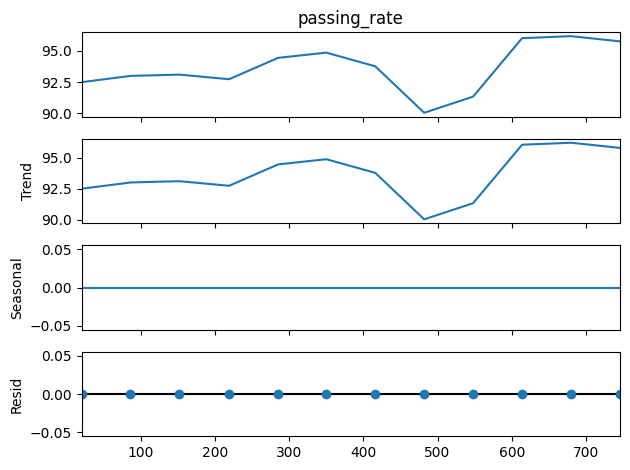

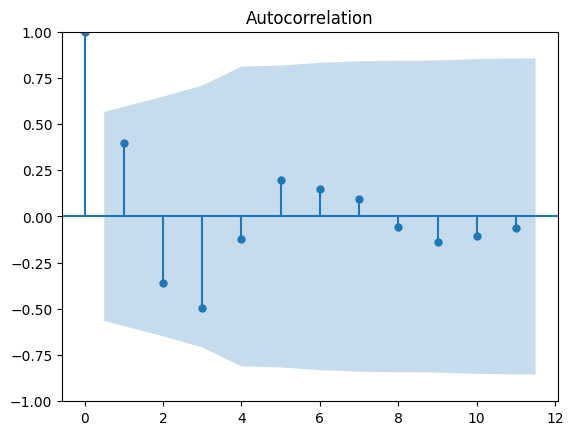

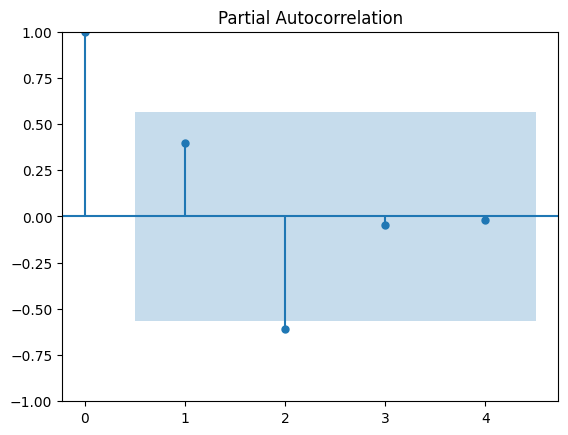

ADF Statistic for Age 10: -3.0619757261692118
p-value: 0.029498148478242257
Checking missing data for the following age group >10: 
 year               False
type               False
age                False
number_reported    False
number_passed      False
passing_rate       False
dtype: bool


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_43801/537782163.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  age_data['passing_rate'].fillna(method='bfill', inplace=True)


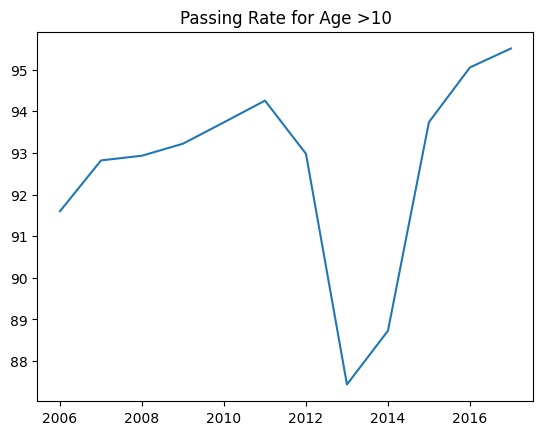

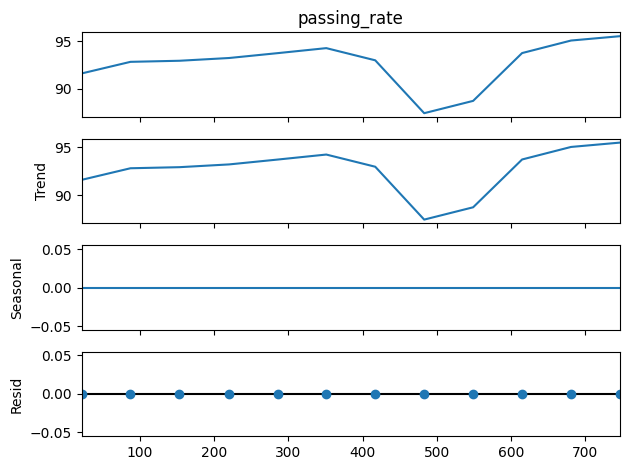

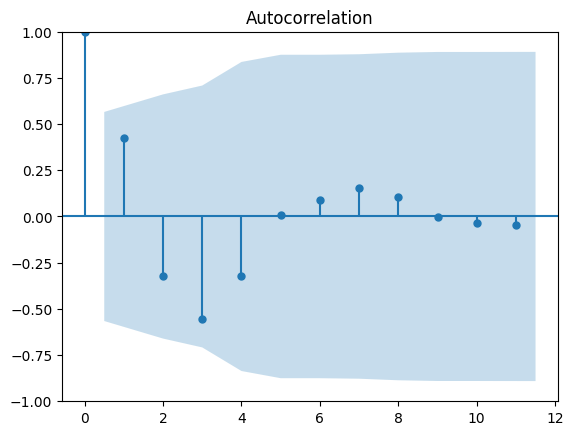

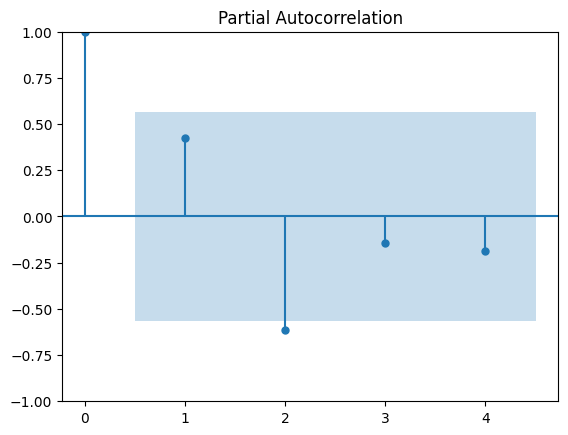

ADF Statistic for Age >10: -1.4296551355851783
p-value: 0.5679794266569965


In [54]:

# Extract unique age groups
age_groups = motorcycle_df['age'].unique()
year_range = list(motorcycle_df['year'].unique())


# Analyze each age group
for age in age_groups:
    
    # filter for each age group 
    age_data = motorcycle_df[motorcycle_df['age'] == age].sort_values('year')
    
    # check for any missing data
    is_null = age_data.isnull().any()
    print(f'Checking missing data for the following age group {age}: \n {is_null}')
    
    # impute if any missing data - not necessary since none
    for year in year_range:
        if year not in age_data['year'].values:
            age_data.loc[len(age_data)] = [year, 'Motorcycles', age, float('nan'), float('nan'), float('nan')]

    age_data = age_data.sort_values('year')
    age_data['passing_rate'].fillna(method='bfill', inplace=True)
            
    years = age_data['year']
    passing_rates = age_data['passing_rate']
    
    # plot graphs for EDA 
    f
    # line graph
    plot_visualisation(age, years, passing_rates)
    
    # decomposition
    plot_decomposition(passing_rates)
    
    # ACF and PACF Plots
    plot_autocorrelation(passing_rates)
    
    # Augmented Dickey-Fuller test
    adf_test(age, passing_rates)
    


Based on the above graphs, p-values of ADF test for all except age group 10 and age group 6 are more than 0.05. This suggests that there is insufficient evidence to reject the null hypothesis that the time series data is non-stationary at the 5% level of significance. 

Stationary Models for age group 10 and age group 6.
group 10: PACF shows a spike at lag 2 -> AR(2), no spike for ACF. 
group 6 : no spike for PACF and ACF -> simple model like SMA or naive forecast


Non-stationarity Models for age group 1, 2, 3, 4, 5, 7, 8, 9, >10:
group 1: ACF has significant lag 1 (q=1), PACF has significant lag 1 (p=1) and non-stationary (d=1) -> ARIMA(1,1,1)
group 2: ACF has no significant lag, PACF has significant lag 1 (p=1) and non-stationary (d=1) -> ARIMA(1,1,0)
group 3: ACF has no significant lag, PACF has significant lag 1 (p=1) and non-stationary (d=1) -> ARIMA(1,1,0)
group 4: ACF has no significant lag, PACF has no significant lag and non-stationary (d=1) -> ARIMA(0,1,0)
group 5: ACF has no significant lag, PACF has no significant lag and non-stationary (d=1) -> ARIMA(0,1,0)
group 7: ACF has no significant lag, PACF has significant lag at 2 (p=2) and non-stationary (d=1) -> ARIMA(2,1,0)

In [55]:
age_groups

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '>10'],
      dtype=object)

In [56]:
predictions = {}

for age in age_groups:
    age_data = df[df['age'] == age].sort_values('year').reset_index(drop=True)
    passing_rates = age_data['passing_rate']

  
    if age == '10':
        # AR
        model = ARIMA(passing_rates, order=(2,0,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1).iloc[0]
    elif age =='6':
        forecast = age_data['passing_rate'].iloc[-1]
        predictions[age] = forecast
    elif age == '1':
        # ARIMA model
        model = ARIMA(passing_rates, order=(1,1,1))
        model_fit = model.fit()
        forecast =model_fit.forecast(steps=1).iloc[0]
    elif age =='2' or age == '3':
        # ARIMA model
        model = ARIMA(passing_rates, order=(1,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1).iloc[0]
        
    elif age =='4' or age =='5': 
        # ARIMA model
        model = ARIMA(passing_rates, order=(0,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1).iloc[0]

    elif age =='7' or age == '8' or age == '9' or  age =='>10':
        # ARIMA model
        model = ARIMA(passing_rates, order=(2,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1).iloc[0]

    else:
        years = age_data['year'].values.reshape(-1, 1)

        # Linear Regression model
        lr_model = LinearRegression()
        lr_model.fit(years, passing_rates)
        next_year = years.max() + 1
        forecast = lr_model.predict([[next_year]])
        
    predictions[age] = forecast
print(f'The estimation of the passing rate in the next year (2018) for each age group is as follows:\n {predictions}')

The estimation of the passing rate in the next year (2018) for each age group is as follows:
 {'1': 79.38063832793783, '2': 89.6154152097939, '3': 90.48231864932711, '4': 91.86948854, '5': 91.34255492, '6': 90.53452116, '7': 90.99850471080323, '8': 91.56157660985147, '9': 92.6599352654912, '10': 71.57969716193072, '>10': 91.87740305693148}


# Task 3: 
### Assuming your estimated rates are true, can you suggest a sensible range of possible passing ranges for motorcycles in the 5-year age group next year (2017), with at least 95% possibility of including the actual passing rate? If you can come up with multiple ranges that meet this criteria, use the one with the narrowest range. You may assume the number of motorcycles is the same as the number in the 4-year age group in the previous year.
if next year == 2017, this year is 2016.

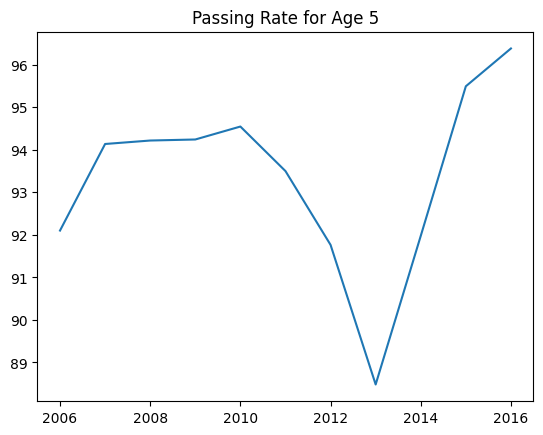

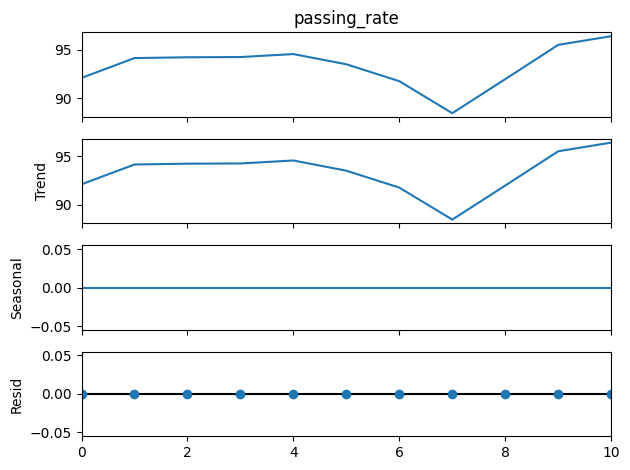

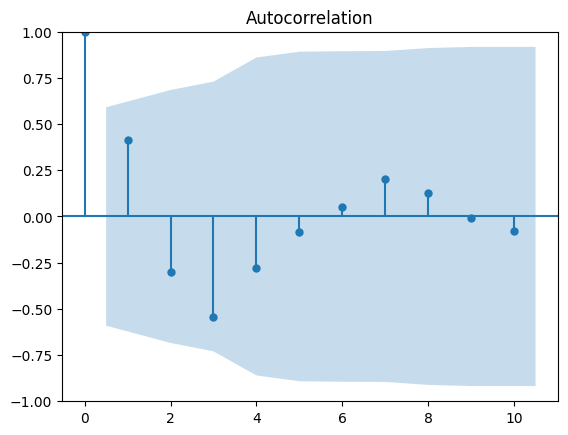

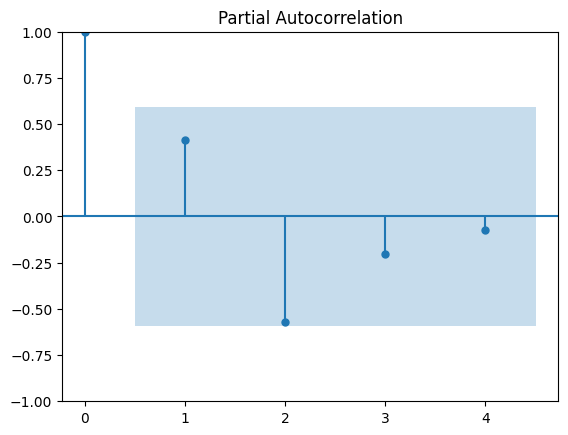

ADF Statistic for Age 5: -2.7073320603182722
p-value: 0.0727780734491693


In [83]:

# extract data for the 5-year age group up to 2016
age_of_interest = '5'
age_five_data = motorcycle_df[(motorcycle_df['age'] == age_of_interest) & (motorcycle_df['year'] <= 2016)].sort_values('year').reset_index(drop=True)
passing_rates_age_five = age_five_data['passing_rate']

years_of_interest = age_five_data['year']

# plot graphs for EDA 
    
# line graph
plot_visualisation(age_of_interest, years_of_interest, passing_rates_age_five)

# decomposition
plot_decomposition(passing_rates_age_five)

# ACF and PACF Plots
plot_autocorrelation(passing_rates_age_five)

# Augmented Dickey-Fuller test
adf_test(age_of_interest, passing_rates_age_five)
    


ADF's p-value is >0.05 thus there is insufficient evidence to reject the null value at the 5% level of significance. Thus, it suggests that the model is not stationary. Significant lag at 2 in PACF (p = 2) and no significant lag found in ACF -> ARIMA (2,1, 0)

In [95]:


# model = SARIMAX(passing_rates_age_five, order=(2,0,0), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
# results = model.fit()

# # Forecast for 2017
# forecast_with_confidence = results.get_forecast(steps=1, alpha=0.05)  # 95% confidence

# forecasted_passing_rate = forecast_with_confidence.predicted_mean.iloc[0]
# lower_bound = forecast_with_confidence.conf_int().iloc[0, 0]
# upper_bound = forecast_with_confidence.conf_int().iloc[0, 1]

# print(f"Forecasted passing rate for 2017: {forecasted_passing_rate:.2f}%")
# print(f"95% confidence interval: ({lower_bound:.2f}%, {upper_bound:.2f}%)")
# actual_passing_rate_for_five = motorcycle_df[(motorcycle_df['age'] == age_of_interest) & (motorcycle_df['year'] == 2017)]['passing_rate'].iloc[0]
# print(f"Actual passing rate for 2017 for age group 5: {actual_passing_rate_for_five:.2f}%")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74215D+00    |proj g|=  8.57787D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     16      1     0     0   8.578D-03   1.742D+00
  F =   1.7421466789285824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Forecasted passing rate for 2017: 96.74%
95% confidence interval: (92.75%, 100.72%)
Actual passing rate for 2017 for age group 5: 96.21%


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [96]:
model = SARIMAX(passing_rates_age_five, order=(2,1,0), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast for 2017
forecast_with_confidence = results.get_forecast(steps=1, alpha=0.05)  # 95% confidence

forecasted_passing_rate = forecast_with_confidence.predicted_mean.iloc[0]
lower_bound = forecast_with_confidence.conf_int().iloc[0, 0]
upper_bound = forecast_with_confidence.conf_int().iloc[0, 1]

print(f"Forecasted passing rate for 2017: {forecasted_passing_rate:.2f}%")
print(f"95% confidence interval: ({lower_bound:.2f}%, {upper_bound:.2f}%)")
actual_passing_rate_for_five = motorcycle_df[(motorcycle_df['age'] == age_of_interest) & (motorcycle_df['year'] == 2017)]['passing_rate'].iloc[0]
print(f"Actual passing rate for 2017 for age group 5: {actual_passing_rate_for_five:.2f}%")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52113D+00    |proj g|=  4.87894D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   4.879D-06   1.521D+00
  F =   1.5211310283045414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Forecasted passing rate for 2017: 95.07%
95% confidence interval: (91.23%, 98.91%)
Actual passing rate for 2017 for age group 5: 96.21%


 This problem is unconstrained.
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Forecasted passing rate for 2017: 95.07%
95% confidence interval: (91.23%, 98.91%)
Actual passing rate for 2017 for age group 5: 96.21%

In [97]:
# model = SARIMAX(passing_rates_age_five, order=(0,1,0), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
# results = model.fit()

# # Forecast for 2017
# forecast_with_confidence = results.get_forecast(steps=1, alpha=0.05)  # 95% confidence

# forecasted_passing_rate = forecast_with_confidence.predicted_mean.iloc[0]
# lower_bound = forecast_with_confidence.conf_int().iloc[0, 0]
# upper_bound = forecast_with_confidence.conf_int().iloc[0, 1]

# print(f"Forecasted passing rate for 2017: {forecasted_passing_rate:.2f}%")
# print(f"95% confidence interval: ({lower_bound:.2f}%, {upper_bound:.2f}%)")
# actual_passing_rate_for_five = motorcycle_df[(motorcycle_df['age'] == age_of_interest) & (motorcycle_df['year'] == 2017)]['passing_rate'].iloc[0]
# print(f"Actual passing rate for 2017 for age group 5: {actual_passing_rate_for_five:.2f}%")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77687D+00    |proj g|=  4.41018D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      6      1     0     0   5.380D-08   1.775D+00
  F =   1.7746225177371997     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Forecasted passing rate for 2017: 96.38%
95% confidence interval: (92.23%, 100.53%)
Actual passing rate for 2017 for age group 5: 96.21%


 This problem is unconstrained.
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
